In [1]:

# we will use the housting file to create a linear regression model, to predict the housting price
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [3]:
housing = pd.read_csv('USA_Housing.csv')

In [4]:
housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [6]:
housing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


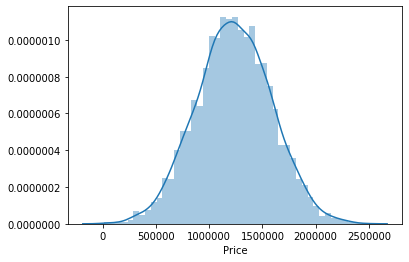

In [7]:
sns.distplot(housing['Price'])

In [8]:
housing.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


In [12]:
#split the set into training and test
from sklearn.model_selection import train_test_split
x=housing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]


In [13]:
y= housing['Price']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state =42)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
#call the linear Regression method
lr=LinearRegression()

In [18]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
predictions =lr.predict(x_test)

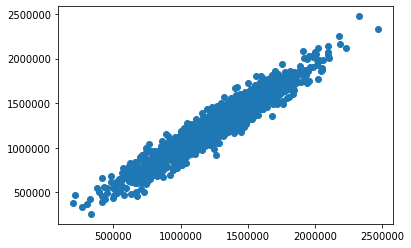

In [20]:
plt.scatter(y_test,predictions)

In [22]:
df =pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df.head(25)

,Actual,Predicted
1501,1.339096e+06,1.308500e+06
2586,1.251794e+06,1.236863e+06
2653,1.340095e+06,1.244411e+06
1055,1.431508e+06,1.228858e+06
705,1.042374e+06,1.061128e+06
106,1.555321e+06,1.542833e+06
589,1.250882e+06,1.094261e+06
2468,1.039381e+06,8.330931e+05
2413,8.324752e+05,7.886513e+05
1600,1.420648e+06,1.469140e+06


In [23]:
#from sklearn, it has a librabry called matrics to show performance metrics
from sklearn import metrics
#mean absolution error =1/n sum(|predictedValue -actual value|)
metrics.mean_absolute_error(y_test,predictions)

80859.62543688527